<a href="https://colab.research.google.com/github/rahulakkasali/prediction_of_price_using_order_blocks-/blob/main/order_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit_learn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('/content/order_book_dataset.csv')
df.head()

,bid_volume,ask_volume,volume_imbalance,spread,bid_depth,ask_depth,bid_orders,ask_orders,momentum,next_price
0,845.2,156.8,0.69,0.75,85.3,42.1,245,89,0.08,50842.3
1,167.3,892.4,-0.68,1.23,38.7,91.5,78,312,-0.07,48657.8
2,512.6,487.3,0.03,0.45,65.2,63.8,189,201,0.01,50123.4
3,723.1,234.5,0.51,0.62,78.9,45.6,267,123,0.05,50567.9
4,198.4,765.2,-0.59,1.15,42.3,82.7,95,278,-0.06,48912.6


In [10]:
df1=df.drop(['bid_depth','ask_depth','bid_orders','ask_orders'],axis=1)
df1.head()

,bid_volume,ask_volume,volume_imbalance,spread,momentum,next_price
0,845.2,156.8,0.69,0.75,0.08,50842.3
1,167.3,892.4,-0.68,1.23,-0.07,48657.8
2,512.6,487.3,0.03,0.45,0.01,50123.4
3,723.1,234.5,0.51,0.62,0.05,50567.9
4,198.4,765.2,-0.59,1.15,-0.06,48912.6


In [12]:
df2=df1.drop(['bid_volume','ask_volume'],axis=1)
df2.head()

,volume_imbalance,spread,momentum,next_price
0,0.69,0.75,0.08,50842.3
1,-0.68,1.23,-0.07,48657.8
2,0.03,0.45,0.01,50123.4
3,0.51,0.62,0.05,50567.9
4,-0.59,1.15,-0.06,48912.6


In [32]:
X=df2.drop(['next_price'],axis=1)
y=df2['next_price']

In [33]:
pipe=make_pipeline(StandardScaler(),LinearRegression())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


In [38]:
print(X_test)

    volume_imbalance  spread  momentum
13              0.51    0.65      0.05
39             -0.69    1.32     -0.08
30             -0.14    0.71     -0.02
45             -0.71    1.33     -0.09
17              0.67    0.71      0.08
48             -0.54    1.08     -0.05
26             -0.65    1.26     -0.07
25              0.71    0.73      0.08
32             -0.60    1.18     -0.06
19              0.23    0.51      0.03


In [35]:
print(y_test)

13    50543.2
39    48534.9
30    49812.7
45    48423.1
17    50987.1
48    49045.6
26    48765.1
25    51045.9
32    48876.5
19    50298.4
Name: next_price, dtype: float64


In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [39]:
pipe.score(X_train,y_train)

0.9872488037575847

In [43]:
pipe.predict(X_test)

array([50578.4375071 , 48580.7834401 , 49577.58503275, 48391.59757621,
       51061.38536892, 49142.22738703, 48769.41295123, 51031.3922048 ,
       48956.56093354, 50389.65158357])

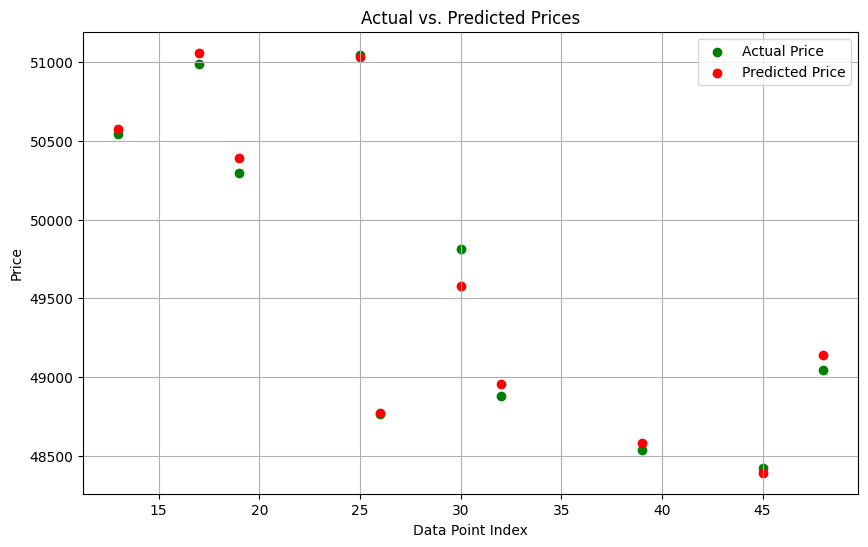

In [50]:
y_pred = pipe.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='green', label='Actual Price')
plt.scatter(y_test.index, y_pred, color='red', label='Predicted Price')
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

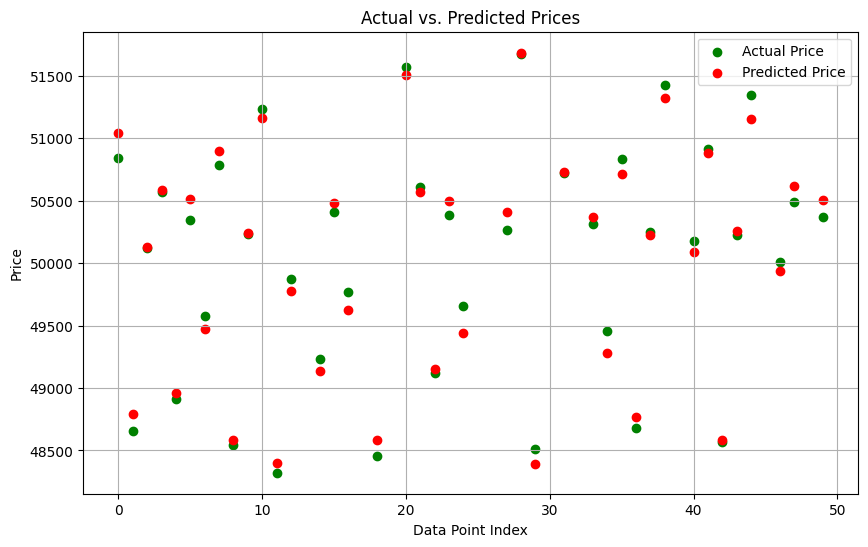

In [51]:
y_pred = pipe.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train.index, y_train, color='green', label='Actual Price')
plt.scatter(y_train.index, y_pred, color='red', label='Predicted Price')
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()